#### Aprendizaje de Máquina - Ejercicios Clase 1 - Teoría - J. Ouret

Ejemplo:
- Genera datos sintéticos para un problema de regresión lineal.
- Ajusta un modelo lineal usando mínimos cuadrados (descenso del gradiente simple).
- Grafica los datos originales y la recta ajustada.
- Muestra la evolución de la función de pérdida (error promedio) en cada iteración.
- Simula datos con ruido (una línea más o menos con pendiente 3 e intercepto 4).
- Usa descenso de gradiente para ajustar los parámetros θ=[intercepto,pendiente]
- Muestra cómo el error promedio (función de pérdida) va disminuyendo iteración a iteración.

Parámetros aprendidos: intercepto=3.89, pendiente=2.93


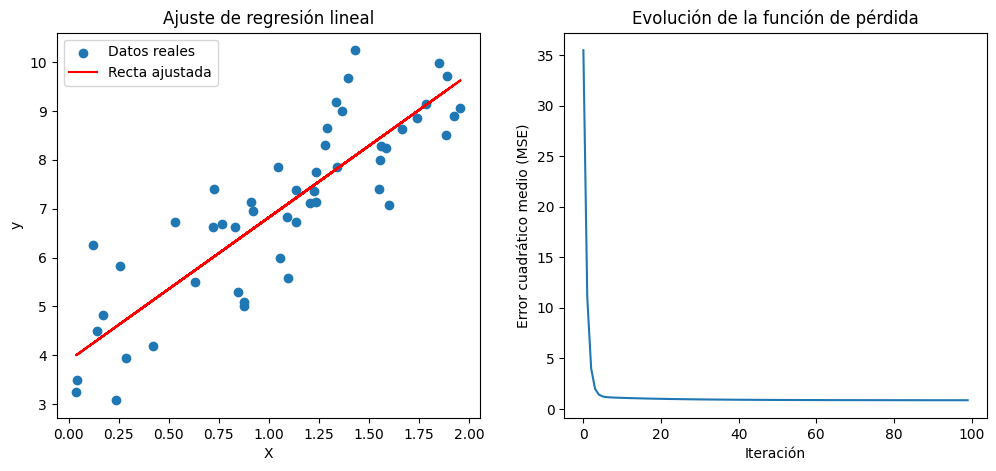

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos (lineal)
np.random.seed(0)
N = 50
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X[:,0] + np.random.randn(N)  # y = 4 + 3x + ruido

# Inicializar parámetro theta = [intercepto, pendiente]
theta = np.random.randn(2)

# Agregar columna de 1s para el intercepto
X_b = np.c_[np.ones((N, 1)), X]

# Función para calcular la predicción
def predict(X, theta):
    return X.dot(theta)

# Función de pérdida (MSE)
def loss(y, y_pred):
    return np.mean((y - y_pred)**2)

# Descenso de gradiente
learning_rate = 0.1
n_iterations = 100
loss_history = []

for i in range(n_iterations):
    y_pred = predict(X_b, theta)
    error = y_pred - y
    gradients = 2/N * X_b.T.dot(error)
    theta = theta - learning_rate * gradients
    current_loss = loss(y, y_pred)
    loss_history.append(current_loss)

# Resultados
print(f"Parámetros aprendidos: intercepto={theta[0]:.2f}, pendiente={theta[1]:.2f}")

# Graficar datos y recta ajustada
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X, y, label="Datos reales")
plt.plot(X, predict(X_b, theta), color='red', label="Recta ajustada")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ajuste de regresión lineal")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iterations), loss_history)
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Evolución de la función de pérdida")

plt.show()


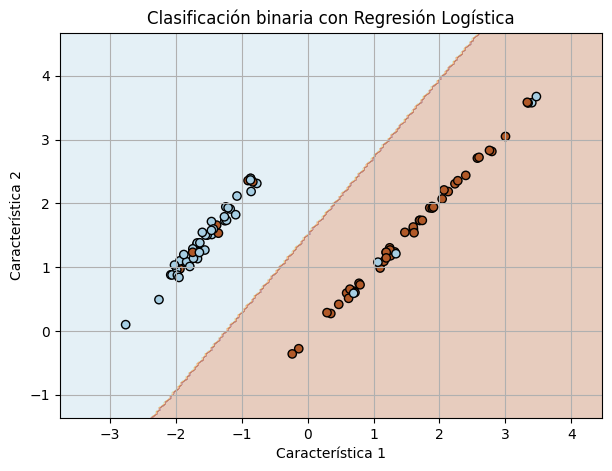

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. Generar datos sintéticos de clasificación binaria (2 clases, 2 características)
X, y = make_classification(
    n_samples=100,      # número de puntos
    n_features=2,       # dos variables para graficar
    n_informative=2,    # ambas variables son relevantes
    n_redundant=0,      # no hay variables redundantes
    n_clusters_per_class=1,
    flip_y=0.1,         # ruido en las etiquetas
    class_sep=1.5,      # separación entre clases
    random_state=42
)

# 2. Entrenar un modelo de regresión logística
clf = LogisticRegression()
clf.fit(X, y)

# 3. Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# 4. Predecir las clases para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Graficar
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  # frontera
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)  # puntos
plt.title("Clasificación binaria con Regresión Logística")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()


In [6]:
!python -m pip list

Package       Version
------------- -------
joblib        1.5.1
numpy         2.2.6
pip           22.0.2
scikit-learn  1.7.1
scipy         1.15.3
setuptools    59.6.0
threadpoolctl 3.6.0


In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: 
Location: /home/javier/Documents/GitRepo/UCA/IA/venv/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [1]:
import sys
print(sys.executable)

/home/javier/Documents/GitRepo/UCA/IA/venv/bin/python
/home/javier/Documents/GitRepo/UCA/IA/venv/bin/python


#### Simular el siguiente escenario:
En un invernadero el objetivo principal es mantener las condiciones óptimas para el cultivo, y el consumo energético es una variable derivada.Ejemplo en Python

Simularemos:
- Temperaturas medidas por el sensor.
- Temperatura ideal para el cultivo (p. ej. 22°C).
- Potencia necesaria para llegar a ese valor.
- Un modelo que aprenda esa relación.

Modelo aprendido: Potencia = 12.01 + -0.05 * Temperatura
Error MSE: 38.4825


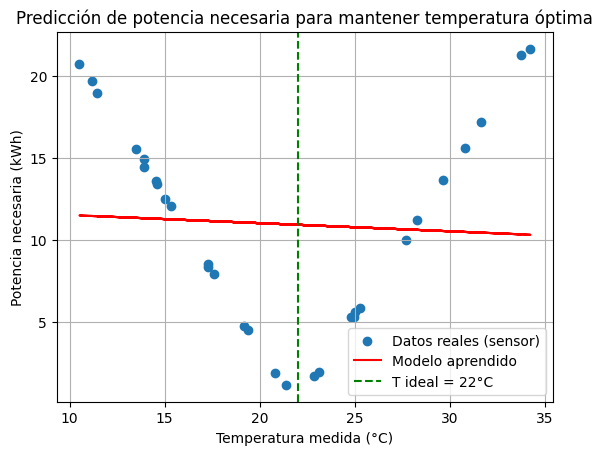

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Parámetros del invernadero
T_ideal = 22
k = 1.8  # factor de consumo por grado de diferencia

# Simulación de temperaturas medidas (°C)
np.random.seed(42)
N = 30
T_medida = np.random.uniform(10, 35, N)

# Potencia necesaria real (kWh)
P_real = k * np.abs(T_ideal - T_medida) + np.random.randn(N) * 0.2

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(T_medida.reshape(-1, 1), P_real)

# Predicciones
P_pred = modelo.predict(T_medida.reshape(-1, 1))

# Pérdida
mse = mean_squared_error(P_real, P_pred)

print(f"Modelo aprendido: Potencia = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f} * Temperatura")
print(f"Error MSE: {mse:.4f}")

# Gráfico
plt.scatter(T_medida, P_real, label="Datos reales (sensor)")
plt.plot(T_medida, P_pred, color='red', label="Modelo aprendido")
plt.axvline(T_ideal, color='green', linestyle='--', label=f"T ideal = {T_ideal}°C")
plt.xlabel("Temperatura medida (°C)")
plt.ylabel("Potencia necesaria (kWh)")
plt.title("Predicción de potencia necesaria para mantener temperatura óptima")
plt.legend()
plt.grid(True)
plt.show()


Calculo manualmente los parámetros θ0​ y θ1​ de la regresión lineal usando la fórmula de mínimos cuadrados

In [1]:
import numpy as np

# Simulación de datos (ya deberían estar generados: T y P)
# Si no los tenés, podés generar con este ejemplo:
np.random.seed(0)
N = 30
T = np.random.uniform(10, 35, N)  # Temperatura medida
theta_0_real = 1.5
theta_1_real = 2.2
ruido = np.random.normal(0, 1.5, N)
P = theta_0_real + theta_1_real * T + ruido  # Potencia real

# Cálculo manual de los parámetros
T_mean = np.mean(T)
P_mean = np.mean(P)

# Fórmulas de mínimos cuadrados
numerador = np.sum((T - T_mean) * (P - P_mean))
denominador = np.sum((T - T_mean) ** 2)

theta_1_manual = numerador / denominador
theta_0_manual = P_mean - theta_1_manual * T_mean

# Mostrar resultados
print(f"theta_0 (intercepto): {theta_0_manual:.4f}")
print(f"theta_1 (pendiente): {theta_1_manual:.4f}")


theta_0 (intercepto): 1.7154
theta_1 (pendiente): 2.1852


- Simula datos realistas de sensores (temperatura y consumo).
- Calcula manualmente θ0​ y θ1​ sin usar LinearRegression.
- Grafica los datos y la recta de regresión calculada a mano.
- Los puntos azules son los datos reales.
- La línea roja es el resultado del modelo ajustado usando solo las fórmulas clásicas, sin librerías automáticas de machine learning.

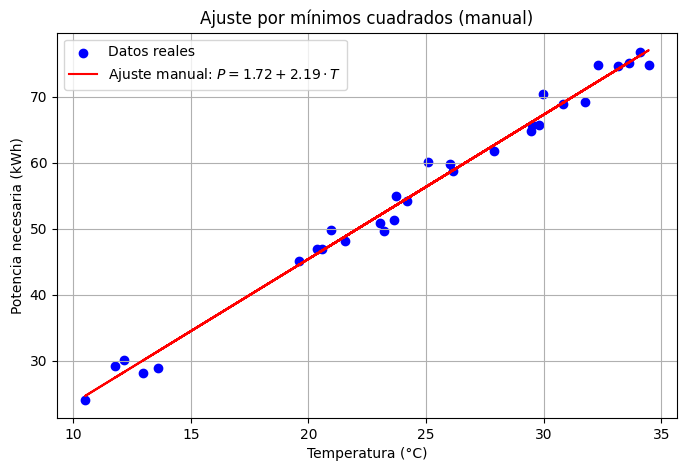

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simular datos
np.random.seed(0)
N = 30
T = np.random.uniform(10, 35, N)  # Temperaturas simuladas
theta_0_real = 1.5
theta_1_real = 2.2
ruido = np.random.normal(0, 1.5, N)
P = theta_0_real + theta_1_real * T + ruido  # Potencia real con ruido

# Cálculo manual de parámetros por mínimos cuadrados
T_mean = np.mean(T)
P_mean = np.mean(P)

# Pendiente (theta_1)
numerador = np.sum((T - T_mean) * (P - P_mean))
denominador = np.sum((T - T_mean) ** 2)
theta_1 = numerador / denominador

# Intercepto (theta_0)
theta_0 = P_mean - theta_1 * T_mean

# Predicción usando el modelo ajustado manualmente
P_pred = theta_0 + theta_1 * T

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(T, P, label="Datos reales", color="blue")
plt.plot(T, P_pred, color="red", label=fr"Ajuste manual: $P = {theta_0:.2f} + {theta_1:.2f} \cdot T$")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Potencia necesaria (kWh)")
plt.title("Ajuste por mínimos cuadrados (manual)")
plt.legend()
plt.grid(True)
plt.show()
